In [92]:
import pandas as pd
import numpy as np
import requests

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler

In [11]:
df = pd.read_csv('./phoneme.csv', low_memory=False)

In [12]:
# Make sure the data loaded correctly.
df.head()

,row.names,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,...,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256,g,speaker
0,1,9.85770,9.20711,9.81689,9.01692,9.05675,8.92518,11.28308,11.52980,10.79713,...,12.68076,11.20767,13.69394,13.72055,12.16628,12.92489,12.51195,9.75527,sh,train.dr1.mcpm0.sa1
1,2,13.23079,14.19189,15.34428,18.11737,19.53875,18.32726,17.34169,17.16861,19.63557,...,8.45714,8.77266,9.59717,8.45336,7.57730,5.38504,9.43063,8.59328,iy,train.dr1.mcpm0.sa1
2,3,10.81889,9.07615,9.77940,12.20135,12.59005,10.53364,8.54693,9.46049,11.96755,...,5.00824,5.51019,5.95725,7.04992,7.02469,6.58416,6.27058,3.85042,dcl,train.dr1.mcpm0.sa1
3,4,10.53679,9.12147,10.84621,13.92331,13.52476,10.27831,8.97459,11.57109,12.35839,...,5.85688,5.40324,6.07126,5.30651,4.27412,3.63384,3.22823,4.63123,dcl,train.dr1.mcpm0.sa1
4,5,12.96705,13.69454,14.91182,18.22292,18.45390,17.25760,17.79614,17.76387,18.99632,...,8.00151,7.58624,6.65202,7.69109,6.93683,7.03600,7.01278,8.52197,aa,train.dr1.mcpm0.sa1


In [26]:
# Set the row.names column as the index. 
df.set_index("row.names", inplace=True)

In [27]:
# Check the size of the dataframe. 
df.shape

(4509, 258)

In [16]:
# Function that displays all columns
def display_all(df):
    with pd.option_context('display.max_row', 4600):
        with pd.option_context('display.max_columns', 1000):
            display(df)

In [28]:
# View the first 5 rows of every column.
display_all(df.head())

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12,x.13,x.14,x.15,x.16,x.17,x.18,x.19,x.20,x.21,x.22,x.23,x.24,x.25,x.26,x.27,x.28,x.29,x.30,x.31,x.32,x.33,x.34,x.35,x.36,x.37,x.38,x.39,x.40,x.41,x.42,x.43,x.44,x.45,x.46,x.47,x.48,x.49,x.50,x.51,x.52,x.53,x.54,x.55,x.56,x.57,x.58,x.59,x.60,x.61,x.62,x.63,x.64,x.65,x.66,x.67,x.68,x.69,x.70,x.71,x.72,x.73,x.74,x.75,x.76,x.77,x.78,x.79,x.80,x.81,x.82,x.83,x.84,x.85,x.86,x.87,x.88,x.89,x.90,x.91,x.92,x.93,x.94,x.95,x.96,x.97,x.98,x.99,x.100,x.101,x.102,x.103,x.104,x.105,x.106,x.107,x.108,x.109,x.110,x.111,x.112,x.113,x.114,x.115,x.116,x.117,x.118,x.119,x.120,x.121,x.122,x.123,x.124,x.125,x.126,x.127,x.128,x.129,x.130,x.131,x.132,x.133,x.134,x.135,x.136,x.137,x.138,x.139,x.140,x.141,x.142,x.143,x.144,x.145,x.146,x.147,x.148,x.149,x.150,x.151,x.152,x.153,x.154,x.155,x.156,x.157,x.158,x.159,x.160,x.161,x.162,x.163,x.164,x.165,x.166,x.167,x.168,x.169,x.170,x.171,x.172,x.173,x.174,x.175,x.176,x.177,x.178,x.179,x.180,x.181,x.182,x.183,x.184,x.185,x.186,x.187,x.188,x.189,x.190,x.191,x.192,x.193,x.194,x.195,x.196,x.197,x.198,x.199,x.200,x.201,x.202,x.203,x.204,x.205,x.206,x.207,x.208,x.209,x.210,x.211,x.212,x.213,x.214,x.215,x.216,x.217,x.218,x.219,x.220,x.221,x.222,x.223,x.224,x.225,x.226,x.227,x.228,x.229,x.230,x.231,x.232,x.233,x.234,x.235,x.236,x.237,x.238,x.239,x.240,x.241,x.242,x.243,x.244,x.245,x.246,x.247,x.248,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256,g,speaker
row.names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9.85770,9.20711,9.81689,9.01692,9.05675,8.92518,11.28308,11.52980,10.79713,9.04747,11.38065,11.61545,10.31166,12.14300,10.65254,11.19395,11.27878,11.13465,11.82706,12.81048,12.32239,10.27542,9.57760,10.62308,11.34983,11.58342,12.19465,10.67933,9.95300,11.47047,11.74805,11.28167,11.51648,12.50765,12.10918,11.97849,10.80743,9.65682,10.71985,9.50841,9.05070,9.04644,9.23663,9.32446,10.88745,10.30159,10.21474,8.58228,10.13717,5.64041,10.36722,11.35874,11.79173,10.71953,10.54219,9.31588,11.23797,10.95954,10.42431,10.76730,12.85619,11.54756,12.42771,12.95010,13.12986,11.66197,9.81353,9.94318,11.66142,10.87687,9.90391,12.44711,12.55300,11.31604,11.73209,12.36401,13.46101,12.72719,14.57622,14.52668,15.84778,14.97477,12.40199,12.98531,14.57738,14.82627,13.80130,12.83100,12.89361,14.52542,15.99887,16.22257,15.59450,13.35326,11.66264,12.51074,12.42637,11.22351,14.26639,13.88541,15.27002,15.51150,16.29901,13.85416,15.22026,9.69417,14.87455,15.79232,16.00566,17.94744,18.88922,17.15669,17.16763,16.56660,15.77859,15.05776,17.13174,15.88719,16.52476,16.51618,15.22415,14.71066,16.18832,15.21284,17.03160,17.09208,15.39357,13.86594,15.43519,13.87737,15.06780,15.04085,15.50000,15.38576,15.13559,11.30995,15.06022,13.78022,13.07629,14.73097,15.53257,15.42290,14.76931,13.46673,12.80912,14.64879,14.98154,15.65347,12.48293,13.99346,11.34256,11.25882,14.42826,14.81829,14.74292,15.52895,14.57437,12.96807,9.47125,14.06748,15.17662,14.63793,12.56142,14.40831,15.26780,12.72713,13.24448,14.05024,14.63124,14.62894,11.85697,14.78919,13.58576,11.03785,11.06893,14.88026,15.12420,15.11843,16.26284,15.49536,14.01744,12.34178,14.02290,14.57751,14.58949,14.65084,12.93824,13.16470,14.01902,11.46139,14.48845,12.73669,12.48442,13.48888,12.69527,13.50160,13.70305,11.91197,13.05270,13.00116,11.70302,12.88790,12.59307,12.28142,12.60633,13.01686,12.58334,13.10122,9.81756,12.79705,13.28552,12.54261,11.75545,10.60134,8.38070,11.93015,11.63846,12.29207,12.57110,10.00457,12.09898,14.08718,13.97254,11.74888,13.23555,13.76750,13.53994,12.28767,13.48164,13.43467,11.43232,11.01716,13.02529,13.37422,7.72797,12.32757,13.37041,12.68903,13.41566,13.16755,13.62844,13.32554,12.46720,13.84955,10.83688,11.23451,13.19359,12.94519,12.68076,11.20767,13.69394,13.72055,12.16628,12.92489,12.51195,9.75527,sh,train.dr1.m

In [29]:
# View the last 5 rows of every column. 
display_all(df.tail())

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12,x.13,x.14,x.15,x.16,x.17,x.18,x.19,x.20,x.21,x.22,x.23,x.24,x.25,x.26,x.27,x.28,x.29,x.30,x.31,x.32,x.33,x.34,x.35,x.36,x.37,x.38,x.39,x.40,x.41,x.42,x.43,x.44,x.45,x.46,x.47,x.48,x.49,x.50,x.51,x.52,x.53,x.54,x.55,x.56,x.57,x.58,x.59,x.60,x.61,x.62,x.63,x.64,x.65,x.66,x.67,x.68,x.69,x.70,x.71,x.72,x.73,x.74,x.75,x.76,x.77,x.78,x.79,x.80,x.81,x.82,x.83,x.84,x.85,x.86,x.87,x.88,x.89,x.90,x.91,x.92,x.93,x.94,x.95,x.96,x.97,x.98,x.99,x.100,x.101,x.102,x.103,x.104,x.105,x.106,x.107,x.108,x.109,x.110,x.111,x.112,x.113,x.114,x.115,x.116,x.117,x.118,x.119,x.120,x.121,x.122,x.123,x.124,x.125,x.126,x.127,x.128,x.129,x.130,x.131,x.132,x.133,x.134,x.135,x.136,x.137,x.138,x.139,x.140,x.141,x.142,x.143,x.144,x.145,x.146,x.147,x.148,x.149,x.150,x.151,x.152,x.153,x.154,x.155,x.156,x.157,x.158,x.159,x.160,x.161,x.162,x.163,x.164,x.165,x.166,x.167,x.168,x.169,x.170,x.171,x.172,x.173,x.174,x.175,x.176,x.177,x.178,x.179,x.180,x.181,x.182,x.183,x.184,x.185,x.186,x.187,x.188,x.189,x.190,x.191,x.192,x.193,x.194,x.195,x.196,x.197,x.198,x.199,x.200,x.201,x.202,x.203,x.204,x.205,x.206,x.207,x.208,x.209,x.210,x.211,x.212,x.213,x.214,x.215,x.216,x.217,x.218,x.219,x.220,x.221,x.222,x.223,x.224,x.225,x.226,x.227,x.228,x.229,x.230,x.231,x.232,x.233,x.234,x.235,x.236,x.237,x.238,x.239,x.240,x.241,x.242,x.243,x.244,x.245,x.246,x.247,x.248,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256,g,speaker
row.names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4505,11.38394,10.21040,16.32658,18.30125,16.91804,10.90029,17.10393,19.37741,18.46994,14.12358,18.14605,20.77542,20.16147,16.41676,15.68507,16.52003,16.17135,12.75764,14.25525,15.92074,15.91837,13.40691,12.94570,15.17792,15.09219,12.49197,12.64849,13.35493,13.36260,11.65455,11.43193,13.27961,13.04773,11.17096,10.78991,11.81404,11.79226,9.46279,10.63820,12.34406,12.03994,11.07628,9.19338,12.09352,11.92289,9.86747,10.58561,11.78233,10.78012,9.85235,9.44482,12.57051,12.11868,11.72306,10.79951,12.60558,12.52149,11.71167,10.29910,12.98048,11.71765,12.74212,12.93573,14.78397,14.28553,14.41145,14.16320,15.91162,14.81900,15.52594,14.64659,14.79332,13.84167,14.30063,14.25588,14.39289,14.38204,13.86226,13.17180,14.39859,14.95457,15.06290,14.98786,13.60639,13.53242,13.36798,13.53532,11.05147,13.45063,12.41736,12.96366,11.42895,11.20408,11.13918,11.77289,10.22350,11.89045,10.57211,11.05444,9.60016,11.36113,10.65403,11.58036,11.18520,5.73373,7.42368,10.37354,9.50161,12.07610,11.40866,11.38953,11.57373,11.78844,12.26616,11.84286,11.49157,12.73864,12.98070,12.42785,12.89203,14.02697,13.59781,11.37474,9.49098,11.22387,11.82125,7.83768,7.86732,10.95798,11.80364,11.20242,10.94574,10.29631,12.03507,11.80119,11.55296,11.97935,12.76266,12.08136,11.72328,10.84325,10.13421,7.06697,7.19708,7.99554,9.11463,8.35515,7.85985,5.81933,5.62283,7.58985,6.34323,6.50484,5.25524,8.30144,8.26714,6.43116,4.33503,7.53045,6.05416,7.13004,5.20171,6.61536,6.01041,6.06082,4.36819,5.91907,6.65396,3.78225,5.06383,4.00117,5.79925,7.25925,2.86403,5.22527,7.02478,0.09607,5.90868,6.94651,3.54501,6.36002,5.76900,7.55601,3.75809,5.22047,7.13500,6.84173,6.21512,5.04428,4.62032,0.27548,4.31394,6.52346,5.77390,6.18890,3.80288,6.77773,5.58365,5.03676,5.73328,5.81045,6.08271,6.79019,6.54038,7.20848,4.78774,5.58309,5.68203,6.59661,4.37308,5.33793,3.99981,6.43685,5.62538,7.65179,6.20936,3.44052,5.12896,6.08398,4.87512,7.83632,6.89232,7.50483,6.76013,6.84512,6.67202,7.98947,6.72664,8.10783,7.73601,7.47997,7.85805,5.39196,6.82891,7.69938,7.77770,8.44810,7.21775,8.77911,9.37682,7.86695,6.78768,6.78191,7.80376,7.88013,5.37485,8.96384,10.01974,9.79996,7.85765,6.92906,8.89384,8.04072,6.99793,6.07412,7.32593,iy,test.dr8.mslb0.sa1
4506,12.01774,11.86761,16.34707,18.05214,15.97599,12.86022,16.83436,18.38985,15.90410,1

In [32]:
# Statistical summary of all the columns. 
display_all(df.describe())

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12,x.13,x.14,x.15,x.16,x.17,x.18,x.19,x.20,x.21,x.22,x.23,x.24,x.25,x.26,x.27,x.28,x.29,x.30,x.31,x.32,x.33,x.34,x.35,x.36,x.37,x.38,x.39,x.40,x.41,x.42,x.43,x.44,x.45,x.46,x.47,x.48,x.49,x.50,x.51,x.52,x.53,x.54,x.55,x.56,x.57,x.58,x.59,x.60,x.61,x.62,x.63,x.64,x.65,x.66,x.67,x.68,x.69,x.70,x.71,x.72,x.73,x.74,x.75,x.76,x.77,x.78,x.79,x.80,x.81,x.82,x.83,x.84,x.85,x.86,x.87,x.88,x.89,x.90,x.91,x.92,x.93,x.94,x.95,x.96,x.97,x.98,x.99,x.100,x.101,x.102,x.103,x.104,x.105,x.106,x.107,x.108,x.109,x.110,x.111,x.112,x.113,x.114,x.115,x.116,x.117,x.118,x.119,x.120,x.121,x.122,x.123,x.124,x.125,x.126,x.127,x.128,x.129,x.130,x.131,x.132,x.133,x.134,x.135,x.136,x.137,x.138,x.139,x.140,x.141,x.142,x.143,x.144,x.145,x.146,x.147,x.148,x.149,x.150,x.151,x.152,x.153,x.154,x.155,x.156,x.157,x.158,x.159,x.160,x.161,x.162,x.163,x.164,x.165,x.166,x.167,x.168,x.169,x.170,x.171,x.172,x.173,x.174,x.175,x.176,x.177,x.178,x.179,x.180,x.181,x.182,x.183,x.184,x.185,x.186,x.187,x.188,x.189,x.190,x.191,x.192,x.193,x.194,x.195,x.196,x.197,x.198,x.199,x.200,x.201,x.202,x.203,x.204,x.205,x.206,x.207,x.208,x.209,x.210,x.211,x.212,x.213,x.214,x.215,x.216,x.217,x.218,x.219,x.220,x.221,x.222,x.223,x.224,x.225,x.226,x.227,x.228,x.229,x.230,x.231,x.232,x.233,x.234,x.235,x.236,x.237,x.238,x.239,x.240,x.241,x.242,x.243,x.244,x.245,x.246,x.247,x.248,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256
count,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.00000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.00000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.00000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,

In [33]:
# Take a look a 5 random rows. 
display_all(df.sample(5))

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12,x.13,x.14,x.15,x.16,x.17,x.18,x.19,x.20,x.21,x.22,x.23,x.24,x.25,x.26,x.27,x.28,x.29,x.30,x.31,x.32,x.33,x.34,x.35,x.36,x.37,x.38,x.39,x.40,x.41,x.42,x.43,x.44,x.45,x.46,x.47,x.48,x.49,x.50,x.51,x.52,x.53,x.54,x.55,x.56,x.57,x.58,x.59,x.60,x.61,x.62,x.63,x.64,x.65,x.66,x.67,x.68,x.69,x.70,x.71,x.72,x.73,x.74,x.75,x.76,x.77,x.78,x.79,x.80,x.81,x.82,x.83,x.84,x.85,x.86,x.87,x.88,x.89,x.90,x.91,x.92,x.93,x.94,x.95,x.96,x.97,x.98,x.99,x.100,x.101,x.102,x.103,x.104,x.105,x.106,x.107,x.108,x.109,x.110,x.111,x.112,x.113,x.114,x.115,x.116,x.117,x.118,x.119,x.120,x.121,x.122,x.123,x.124,x.125,x.126,x.127,x.128,x.129,x.130,x.131,x.132,x.133,x.134,x.135,x.136,x.137,x.138,x.139,x.140,x.141,x.142,x.143,x.144,x.145,x.146,x.147,x.148,x.149,x.150,x.151,x.152,x.153,x.154,x.155,x.156,x.157,x.158,x.159,x.160,x.161,x.162,x.163,x.164,x.165,x.166,x.167,x.168,x.169,x.170,x.171,x.172,x.173,x.174,x.175,x.176,x.177,x.178,x.179,x.180,x.181,x.182,x.183,x.184,x.185,x.186,x.187,x.188,x.189,x.190,x.191,x.192,x.193,x.194,x.195,x.196,x.197,x.198,x.199,x.200,x.201,x.202,x.203,x.204,x.205,x.206,x.207,x.208,x.209,x.210,x.211,x.212,x.213,x.214,x.215,x.216,x.217,x.218,x.219,x.220,x.221,x.222,x.223,x.224,x.225,x.226,x.227,x.228,x.229,x.230,x.231,x.232,x.233,x.234,x.235,x.236,x.237,x.238,x.239,x.240,x.241,x.242,x.243,x.244,x.245,x.246,x.247,x.248,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256,g,speaker
row.names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3411,11.10898,9.24938,17.51712,19.25308,17.72700,11.97012,19.13703,20.95978,19.52986,11.53774,18.71058,20.81339,19.25409,14.83136,21.25866,23.50917,22.32266,17.70784,21.98811,24.73929,23.88155,18.55205,20.23103,21.98789,20.19694,16.50870,16.92075,19.39824,18.88777,16.77109,19.32705,22.29831,21.68740,18.89509,18.94816,21.58841,22.14585,19.36166,17.33206,19.50301,18.44484,13.54642,11.13346,16.74249,16.18839,12.39908,14.72982,16.71849,16.75810,10.33161,13.44498,14.10254,11.30434,12.49039,14.22396,15.26575,14.78465,11.59996,12.95737,11.60488,13.11442,13.20996,12.59272,15.52269,14.77945,13.41805,13.13651,14.61919,13.48431,12.43925,15.09364,16.92276,16.95791,15.12345,15.97818,17.53821,15.38093,14.29831,16.90368,18.87822,18.43478,15.36832,15.51754,17.03535,15.43217,13.14259,14.02191,17.08049,17.54119,14.90094,13.90761,17.52447,17.43394,15.14688,16.22319,18.78236,19.02918,16.39621,13.81379,18.06346,18.72940,16.41317,15.71100,17.92942,18.42771,16.05640,11.22631,14.83486,15.74739,13.43759,13.24400,13.16411,12.85005,11.88248,10.53871,12.03817,10.90350,12.55177,10.14610,12.22395,10.60725,11.13464,10.08700,11.45618,11.70149,10.81529,9.77426,11.73085,10.82110,11.40086,9.72276,10.58907,10.09455,10.63122,10.18030,9.80287,11.15161,9.27906,10.81018,8.93242,10.94304,10.10686,10.60000,9.92147,9.85982,10.71453,9.46863,11.28616,8.28042,11.10098,9.13051,10.35127,11.05814,7.89378,10.80776,10.48913,8.81385,10.86176,9.01625,10.48755,10.03571,10.13393,8.89867,10.82970,9.05210,10.75217,9.72905,9.54089,10.57828,10.14035,10.79003,9.74001,9.72335,9.57793,9.55375,11.38711,7.16403,11.56456,9.43628,11.11815,10.83658,10.97042,10.60413,10.34005,11.47147,11.29865,7.42289,12.29521,11.12262,12.17667,9.20013,8.54060,12.21495,10.02728,10.97723,11.67102,12.40282,12.04534,11.00475,10.93135,9.28218,10.92911,9.27946,9.91651,12.19461,11.49836,12.82560,10.92716,11.89326,11.58126,11.15578,12.40911,12.78174,11.67449,11.61609,10.23598,11.37613,11.74417,11.21953,10.67547,12.25808,10.53948,10.77423,10.45729,9.02299,10.81697,10.45517,8.06041,11.43787,10.02489,10.93493,10.13606,8.08720,10.84308,9.93561,9.75993,11.09392,10.20764,10.36252,10.07064,9.60664,11.12425,8.77010,9.39726,10.49877,9.82566,10.41023,9.08366,10.02519,10.38901,9.61018,9.11980,9.77462,10.11159,10.02887,9.51060,ao,test.dr2.mabw0.sa1
1826,1

In [37]:
# Check for missing values. 
display_all(df.isnull().sum())

x.1        0
x.2        0
x.3        0
x.4        0
x.5        0
x.6        0
x.7        0
x.8        0
x.9        0
x.10       0
x.11       0
x.12       0
x.13       0
x.14       0
x.15       0
x.16       0
x.17       0
x.18       0
x.19       0
x.20       0
x.21       0
x.22       0
x.23       0
x.24       0
x.25       0
x.26       0
x.27       0
x.28       0
x.29       0
x.30       0
x.31       0
x.32       0
x.33       0
x.34       0
x.35       0
x.36       0
x.37       0
x.38       0
x.39       0
x.40       0
x.41       0
x.42       0
x.43       0
x.44       0
x.45       0
x.46       0
x.47       0
x.48       0
x.49       0
x.50       0
x.51       0
x.52       0
x.53       0
x.54       0
x.55       0
x.56       0
x.57       0
x.58       0
x.59       0
x.60       0
x.61       0
x.62       0
x.63       0
x.64       0
x.65       0
x.66       0
x.67       0
x.68       0
x.69       0
x.70       0
x.71       0
x.72       0
x.73       0
x.74       0
x.75       0
x.76       0
x.77       0

### There are no missing values which is very good news. 

In [38]:
# Quick double check to make sure there are no missing values. 
df.isnull().sum().sum()

0

In [39]:
# View the breakdown/count of phenomes. 
x = df['g'].value_counts()
x

iy     1163
ao     1022
sh      872
dcl     757
aa      695
Name: g, dtype: int64

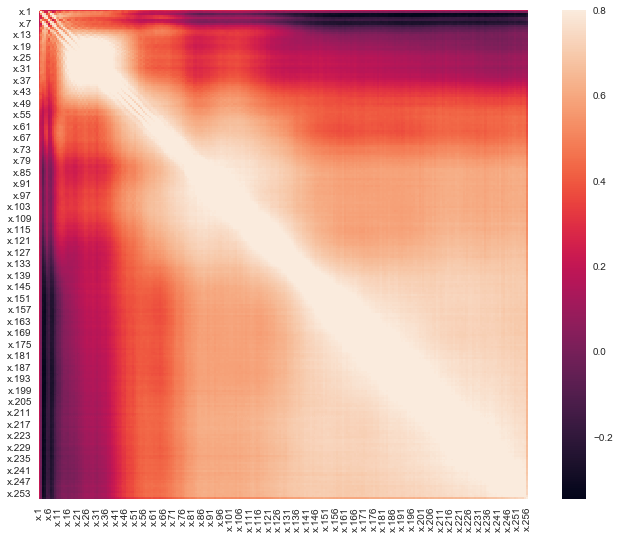

In [41]:
#correlation heatmap
corrmap = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmap, vmax=.8, square=True);

In [52]:
df.corr()

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,...,x.247,x.248,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256
x.1,1.000000,0.381609,0.189072,0.223415,0.237694,0.199333,0.167783,0.204255,0.211074,0.261235,...,0.201464,0.197410,0.200707,0.206729,0.199516,0.204988,0.196088,0.196323,0.205685,0.179980
x.2,0.381609,1.000000,0.566498,0.257548,0.247554,0.645435,0.440540,0.231614,0.304453,0.483728,...,-0.014932,-0.024290,-0.014390,-0.001577,-0.009097,-0.014040,-0.009496,-0.001868,0.000375,-0.000142
x.3,0.189072,0.566498,1.000000,0.728690,0.371442,0.456808,0.811709,0.741022,0.517851,0.485396,...,-0.314674,-0.315218,-0.317457,-0.302305,-0.316005,-0.319730,-0.311703,-0.304184,-0.306382,-0.263589
x.4,0.223415,0.257548,0.728690,1.000000,0.710611,0.378469,0.619399,0.821228,0.762377,0.668170,...,-0.281551,-0.278138,-0.281670,-0.265253,-0.280111,-0.281832,-0.275719,-0.271394,-0.277089,-0.240917
x.5,0.237694,0.247554,0.371442,0.710611,1.000000,0.439367,0.283180,0.582308,0.786944,0.604508,...,-0.166641,-0.167491,-0.162458,-0.152075,-0.155903,-0.149769,-0.152591,-0.149079,-0.160124,-0.138613
x.6,0.199333,0.645435,0.456808,0.378469,0.439367,1.000000,0.518439,0.210145,0.343268,0.728891,...,-0.173192,-0.180903,-0.172008,-0.159370,-0.165795,-0.172715,-0.172830,-0.161078,-0.154644,-0.138381
x.7,0.167783,0.440540,0.811709,0.619399,0.283180,0.518439,1.000000,0.680255,0.349798,0.445076,...,-0.229996,-0.232552,-0.236502,-0.215618,-0.232513,-0.240593,-0.235108,-0.226296,-0.219382,-0.202774
x.8,0.204255,0.231614,0.741022,0.821228,0.582308,0.210145,0.680255,1.000000,0.705977,0.465542,...,-0.199581,-0.194246,-0.203238,-0.185688,-0.197887,-0.200257,-0.197964,-0.191076,-0.198441,-0.174817
x.9,0.211074,0.304453,0.517851,0.762377,0.786944,0.343268,0.349798,0.705977,1.000000,0.663006,...,-0.104892,-0.103518,-0.098830,-0.087398,-0.099126,-0.093470,-0.096324,-0.089829,-0.100453,-0.098366
x.10,0.261235,0.483728,0.485396,0.668170,0.604508,0.728891,0.445076,0.465542,0.663006,1.000000,...,-0.059164,-0.060469,-0.053706,-0.039567,-0.051007,-0.058187,-0.056049,-0.046811,-0.049665,-0.045030


In [54]:
pd.crosstab(df.speaker, df.g)

g,aa,ao,dcl,iy,sh
speaker,,,,,
test.dr1.mdab0.sa1,2,1,1,2,2
test.dr1.mjsw0.sa1,2,2,2,2,2
test.dr1.mreb0.sa1,2,2,2,3,2
test.dr1.mrjo0.sa1,1,3,1,3,2
test.dr1.msjs1.sa1,1,2,2,1,2
test.dr1.mstk0.sa1,2,2,2,1,2
test.dr1.mwbt0.sa1,1,3,1,3,2
test.dr2.mabw0.sa1,1,3,2,0,2
test.dr2.mbjk0.sa1,1,3,2,3,2


# LDA Classifier

### Feature Set

In [95]:
X = df.drop(columns =  ['g', 'speaker']).values
y = df['g'].values

### Train-Test Split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [67]:
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (3381, 256) (3381,)
Testing set: (1128, 256) (1128,)


### Training the Model

In [68]:
lda = LinearDiscriminantAnalysis()

In [69]:
lda.fit(X_train, y_train)
lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

### Predict

In [70]:
yhat = lda.predict(X_test)
yhat

array(['sh', 'aa', 'iy', ..., 'ao', 'iy', 'dcl'], dtype='<U3')

### Accuracy Evaluation¶

Using accuracy classification score to compute subset accuracy. This function is equal to the Jaccard similarity score function. This computes how closely the actual labels and the predicted labels matched in the train set.

In [74]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, lda.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9384797397219757
Test set Accuracy:  0.9273049645390071


In [75]:
lda.score(X_test, y_test)

0.9273049645390071

In [82]:
# classification report. 
print(classification_report(y_test, yhat))

             precision    recall  f1-score   support

         aa       0.79      0.79      0.79       181
         ao       0.83      0.83      0.83       231
        dcl       0.99      0.98      0.99       196
         iy       0.99      0.99      0.99       290
         sh       1.00      1.00      1.00       230

avg / total       0.93      0.93      0.93      1128



### Cross Validation

In [89]:
# Normalize the data. 
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [90]:
scores = cross_val_score(lda, Xs, y, cv=5)

In [91]:
np.mean(scores)

0.9261313126352562

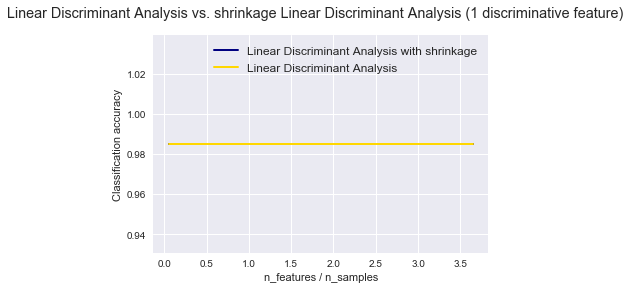

In [98]:
acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):


        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X, y)

        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)

features_samples_ratio = np.array(n_features_range) / n_train

plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
         label="Linear Discriminant Analysis with shrinkage", color='navy')
plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
         label="Linear Discriminant Analysis", color='gold')

plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')

plt.legend(loc=1, prop={'size': 12})
plt.suptitle('Linear Discriminant Analysis vs. \
shrinkage Linear Discriminant Analysis (1 discriminative feature)')
plt.show()